# Descriptive analysis for news headlines and stock data
This analysis covers the following topics:
* Date distribution (by year)
* Stocks
    * What was the max closing price? Min closing price?
    * How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
    * How has the DJIA changed over time (closing price)?
    * Number of days above average and below average each year
    * What are the main topics on days that are above mean stock price?
    * What are the topics on days that are below mean stock price?
* News headlines
    * Keyword distribution
    * Top keyword distribution over time
    * How many keywords are used across all news headlines in our data?
    * How do news headline topics change over time?

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Import and clean data

In [2]:
# Headline data
headlines = pd.read_csv("../Data/RedditNews.csv")

# DJIA stock data
djia = pd.read_csv("../Data/upload_DJIA_table.csv")

In [3]:
headlines.shape

(73608, 2)

In [4]:
# Drop nulls
djia.dropna(how="any", inplace=True)
headlines.dropna(how="any", inplace=True)

In [5]:
# Review data
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [6]:
headlines.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


# Date distribution by year

In [7]:
# Get year data from 'Date column'
import datetime
import seaborn as sns

# Convert the column to datetime, parse out year, then reassign to column
djia['Date'] = pd.to_datetime(djia['Date'], format="%Y-%m-%d")
djia['Year'] = djia['Date'].dt.year
djia['Volume (Millions)'] = djia['Volume'] / 1000000
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Volume (Millions)
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,2016,82.16
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,2016,133.03
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,2016,106.38
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,2016,112.19
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,2016,138.74


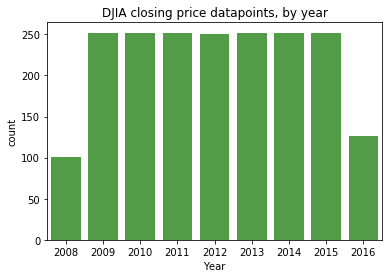

In [8]:
# Plot year value counts
ax = sns.countplot(djia['Year'], color='#47a939')
ax.set(title='DJIA closing price datapoints, by year')
plt.show()

# Explore the stock data

In [9]:
# What was the max closing price? Min closing price?
djia_max = djia['Close'].max()
djia_min = djia['Close'].min()
djia_max_date = djia['Date'][djia['Close'] == djia_max]
djia_min_date = djia['Date'][djia['Close'] == djia_min]

print(f"The maximum closing price of the DJIA was {djia_max} on {djia_max_date.loc[283]}.")
print(f"The minimum closing price of the DJIA was {djia_min} on {djia_min_date.loc[1843]}.")

The maximum closing price of the DJIA was 18312.390625 on 2015-05-19 00:00:00.
The minimum closing price of the DJIA was 6547.049805 on 2009-03-09 00:00:00.


In [10]:
# Number of days above average and below average each year
djia_median = djia['Close'].median()
print(f"The mean closing price of the DJIA was {djia_median}.")

The mean closing price of the DJIA was 13025.580078.


In [11]:
# What was the max trading volume? Min trading volume?
djia_vol_max = djia['Volume (Millions)'].max()
djia_vol_min = djia['Volume (Millions)'].min()
djia_vol_max_date = djia['Date'][djia['Volume (Millions)'] == djia_vol_max]
djia_vol_min_date = djia['Date'][djia['Volume (Millions)'] == djia_vol_min]

print(f"The maximum trading volume of the DJIA was {djia_vol_max} million on {djia_vol_max_date.loc[1944]}.")
print(f"The minimum trading volume of the DJIA was {djia_vol_min} million on {djia_vol_min_date.loc[1133]}.")

The maximum trading volume of the DJIA was 674.92 million on 2008-10-10 00:00:00.
The minimum trading volume of the DJIA was 8.41 million on 2011-12-29 00:00:00.


/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


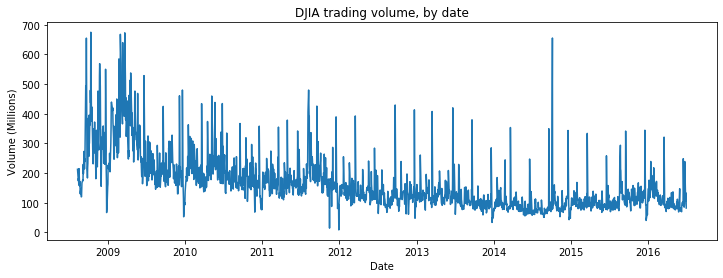

In [12]:
# How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x="Date", y="Volume (Millions)", ax=ax, data=djia)
ax.set(title='DJIA trading volume, by date')
plt.show()
#TODO: Cleanup plot to remove space at margins, add in grids for month and year

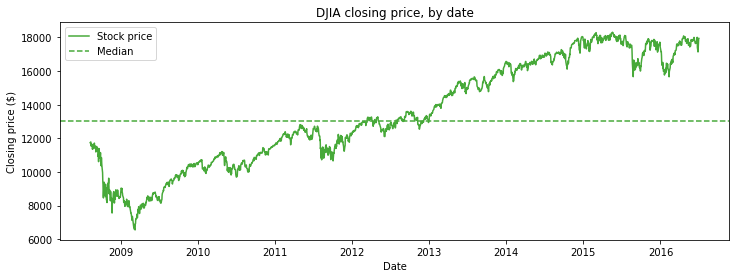

In [13]:
# How has the DJIA changed over time (closing price)?
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x='Date', y='Close', ax=ax, data=djia,color='#47a939')
ax.set(title='DJIA closing price, by date', ylabel='Closing price ($)')
ax.axhline(djia_median, ls='--', color='#47a939', label='Median')
plt.legend(labels = ['Stock price', 'Median'])
plt.show()

# Explore news headlines

* Keyword distribution
* Top keyword distribution over time
* How many keywords are used across all news headlines in our data?
* How do news headline topics change over time?
* What are the main topics on days that are above median stock price?
* What are the topics on days that are below median stock price?

## NLTK `FreqDist` keyword analysis
Based on a simple count of how often words appear in news headlines for our entire dataset, what can we learn?

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import numpy as np
np.random.seed(22)

[nltk_data] Downloading package wordnet to /Users/stacy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/stacy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocess headline text

In [15]:
# Preprocess the headline data
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v') 

# Remove stopwords and words shorter than 3 characters, then lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [16]:
# Apply the preprocessing functions to the headlines
headlines['cleaned_headlines'] = headlines['News'].apply(preprocess)

In [17]:
# Combine all cleaned and lemmatized headline tokens into a single "document"
all_words = ""

for l in headlines['cleaned_headlines']:
    new_line = ""
    for w in l:
        new_line += " " + w
    all_words += " " + new_line

# Print the first hundred characters in the string to confirm that it is working correctly
all_words[:101]

'  year woman mexico city finally receive birth certificate die hours later trinidad alvarez lira wait'

## Count word distribution across all headlines

In [18]:
# Tokenize all words in the document so we can plot the most used words across all headlines
words = nltk.tokenize.word_tokenize(all_words)
fd = nltk.FreqDist(words)

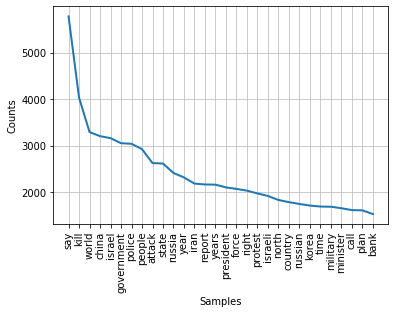

In [19]:
fd.plot(30)

In [20]:
# How many keywords total across all headlines in our dataset?
keywords = len(words)

print(f"There were {keywords} keywords used across all headlines in the dataset.")

There were 740725 keywords used across all headlines in the dataset.


(('north', 'korea'), 1102)
(('prime', 'minister'), 765)
(('human', 'right'), 724)
(('saudi', 'arabia'), 583)
(('unite', 'state'), 492)
(('islamic', 'state'), 445)
(('south', 'korea'), 349)
(('climate', 'change'), 326)
(('west', 'bank'), 321)
(('north', 'korean'), 294)
(('middle', 'east'), 284)
(('julian', 'assange'), 242)
(('vladimir', 'putin'), 238)
(('hong', 'kong'), 235)
(('south', 'africa'), 229)
(('kill', 'people'), 228)
(('edward', 'snowden'), 228)
(('court', 'rule'), 220)
(('police', 'officer'), 212)
(('shoot', 'dead'), 211)


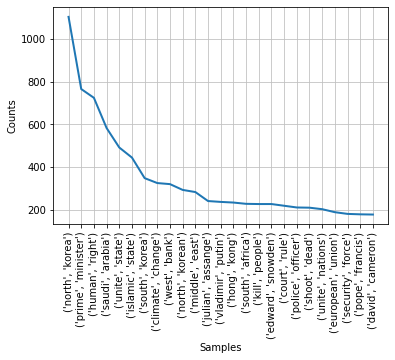

In [21]:
# How many terms (word pairs) appear across all headlines?

# https://inzaniak.github.io/pybistuffblog/posts/2017/February/nltk-counting-words
# Get Bigrams from text
bigrams = nltk.bigrams(words)
# Calculate Frequency Distribution for Bigrams
freq_bi = nltk.FreqDist(bigrams)

# Print and plot most common bigrams
for phrase in freq_bi.most_common(20):
    print(phrase)
freq_bi.plot(25)

(('nobel', 'peace', 'prize'), 87)
(('president', 'vladimir', 'putin'), 78)
(('great', 'barrier', 'reef'), 75)
(('human', 'right', 'watch'), 75)
(('nuclear', 'power', 'plant'), 73)
(('president', 'barack', 'obama'), 65)
(('president', 'bashar', 'assad'), 62)
(('human', 'right', 'group'), 60)
(('female', 'genital', 'mutilation'), 50)
(('founder', 'julian', 'assange'), 47)
(('chancellor', 'angela', 'merkel'), 46)
(('human', 'right', 'abuse'), 46)
(('wikileaks', 'founder', 'julian'), 45)
(('trans', 'pacific', 'partnership'), 42)
(('sentence', 'years', 'prison'), 39)
(('world', 'health', 'organization'), 39)
(('fukushima', 'nuclear', 'plant'), 39)
(('international', 'criminal', 'court'), 39)
(('human', 'right', 'council'), 38)
(('russian', 'president', 'vladimir'), 38)


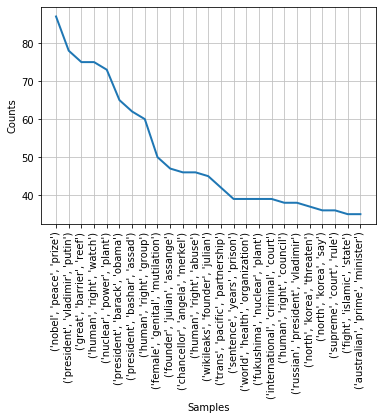

In [22]:
# How many terms (word triples) appear across all headlines?

# https://inzaniak.github.io/pybistuffblog/posts/2017/February/nltk-counting-words
# Get Bigrams from text
trigrams = nltk.trigrams(words)
# Calculate Frequency Distribution for Bigrams
freq_tri = nltk.FreqDist(trigrams)

# Print and plot most common bigrams
for phrase in freq_tri.most_common(20):
    print(phrase)
freq_tri.plot(25)

## Headline changes over time
* For each headline, count how often each of the top 10 terms appear per month over all time
* Plot it

In [23]:
top_20 = fd.most_common(20)

cleaned = []
not_useful = ['say', 'people', 'year', 'years', 'report', 'force', 'right']

for keyword in top_20:
    word = keyword[0]
    if word not in not_useful:
        cleaned.append(word)
    else: 
        pass
    
print(cleaned)

['kill', 'world', 'china', 'israel', 'government', 'police', 'attack', 'state', 'russia', 'iran', 'president', 'protest', 'israeli']


In [24]:
headlines.head()

,Date,News,cleaned_headlines
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,"[year, woman, mexico, city, finally, receive, ..."
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"[chief, back, athens, permanent, olympic, host]"
2,2016-07-01,"The president of France says if Brexit won, so...","[president, france, say, brexit, donald, trump]"
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,"[british, police, hours, notice, threaten, hun..."
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,"[nobel, laureates, urge, greenpeace, stop, opp..."


In [25]:
for word in cleaned:
    headlines[word] = 0
    
headlines.head()

,Date,News,cleaned_headlines,kill,world,china,israel,government,police,attack,state,russia,iran,president,protest,israeli
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,"[year, woman, mexico, city, finally, receive, ...",0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"[chief, back, athens, permanent, olympic, host]",0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-07-01,"The president of France says if Brexit won, so...","[president, france, say, brexit, donald, trump]",0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,"[british, police, hours, notice, threaten, hun...",0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,"[nobel, laureates, urge, greenpeace, stop, opp...",0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
for index, row in headlines.iterrows():
    for word in cleaned:
        if word in row['cleaned_headlines']:
            row[word] += 1

In [27]:
headlines.head()

,Date,News,cleaned_headlines,kill,world,china,israel,government,police,attack,state,russia,iran,president,protest,israeli
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,"[year, woman, mexico, city, finally, receive, ...",0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"[chief, back, athens, permanent, olympic, host]",0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-07-01,"The president of France says if Brexit won, so...","[president, france, say, brexit, donald, trump]",0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,"[british, police, hours, notice, threaten, hun...",0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,"[nobel, laureates, urge, greenpeace, stop, opp...",0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
headlines['attack'].sum()

0